<a href="https://colab.research.google.com/github/BhorSant/Project/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Yes Bank Stock Closing Price Prediction

##### **Project Type**    -Regression
##### **Contribution**    - Individual
##### **Name : Bhor Santosh Baburav**

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**

https://colab.research.google.com/github/BhorSant/Machine-Learning-Assiangment/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb#scrollTo=BZR9WyysphqO

# **Problem Statement**


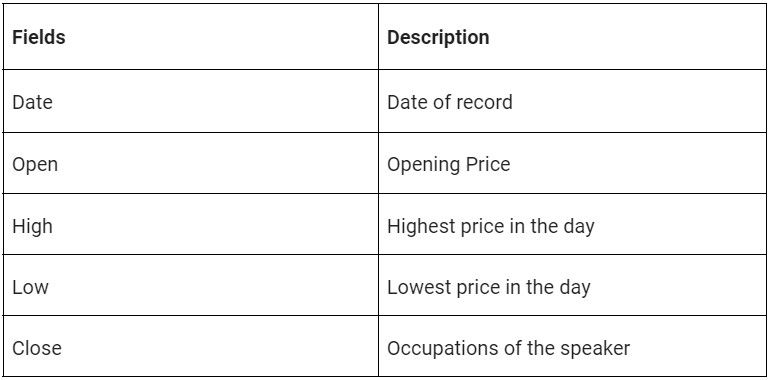**Investigate and quantify the influence of the Rana Kapoor fraud case on the monthly stock prices of Yes Bank. Identify patterns, anomalies, and trends in the stock prices during and after the occurrence of the fraud case.**

**Build robust predictive models, such as time series models (e.g., ARIMA, SARIMA) or machine learning models, to forecast the monthly closing stock prices of Yes Bank. Evaluate the models' accuracy in capturing and predicting fluctuations, especially considering the impact of the Rana Kapoor case.**

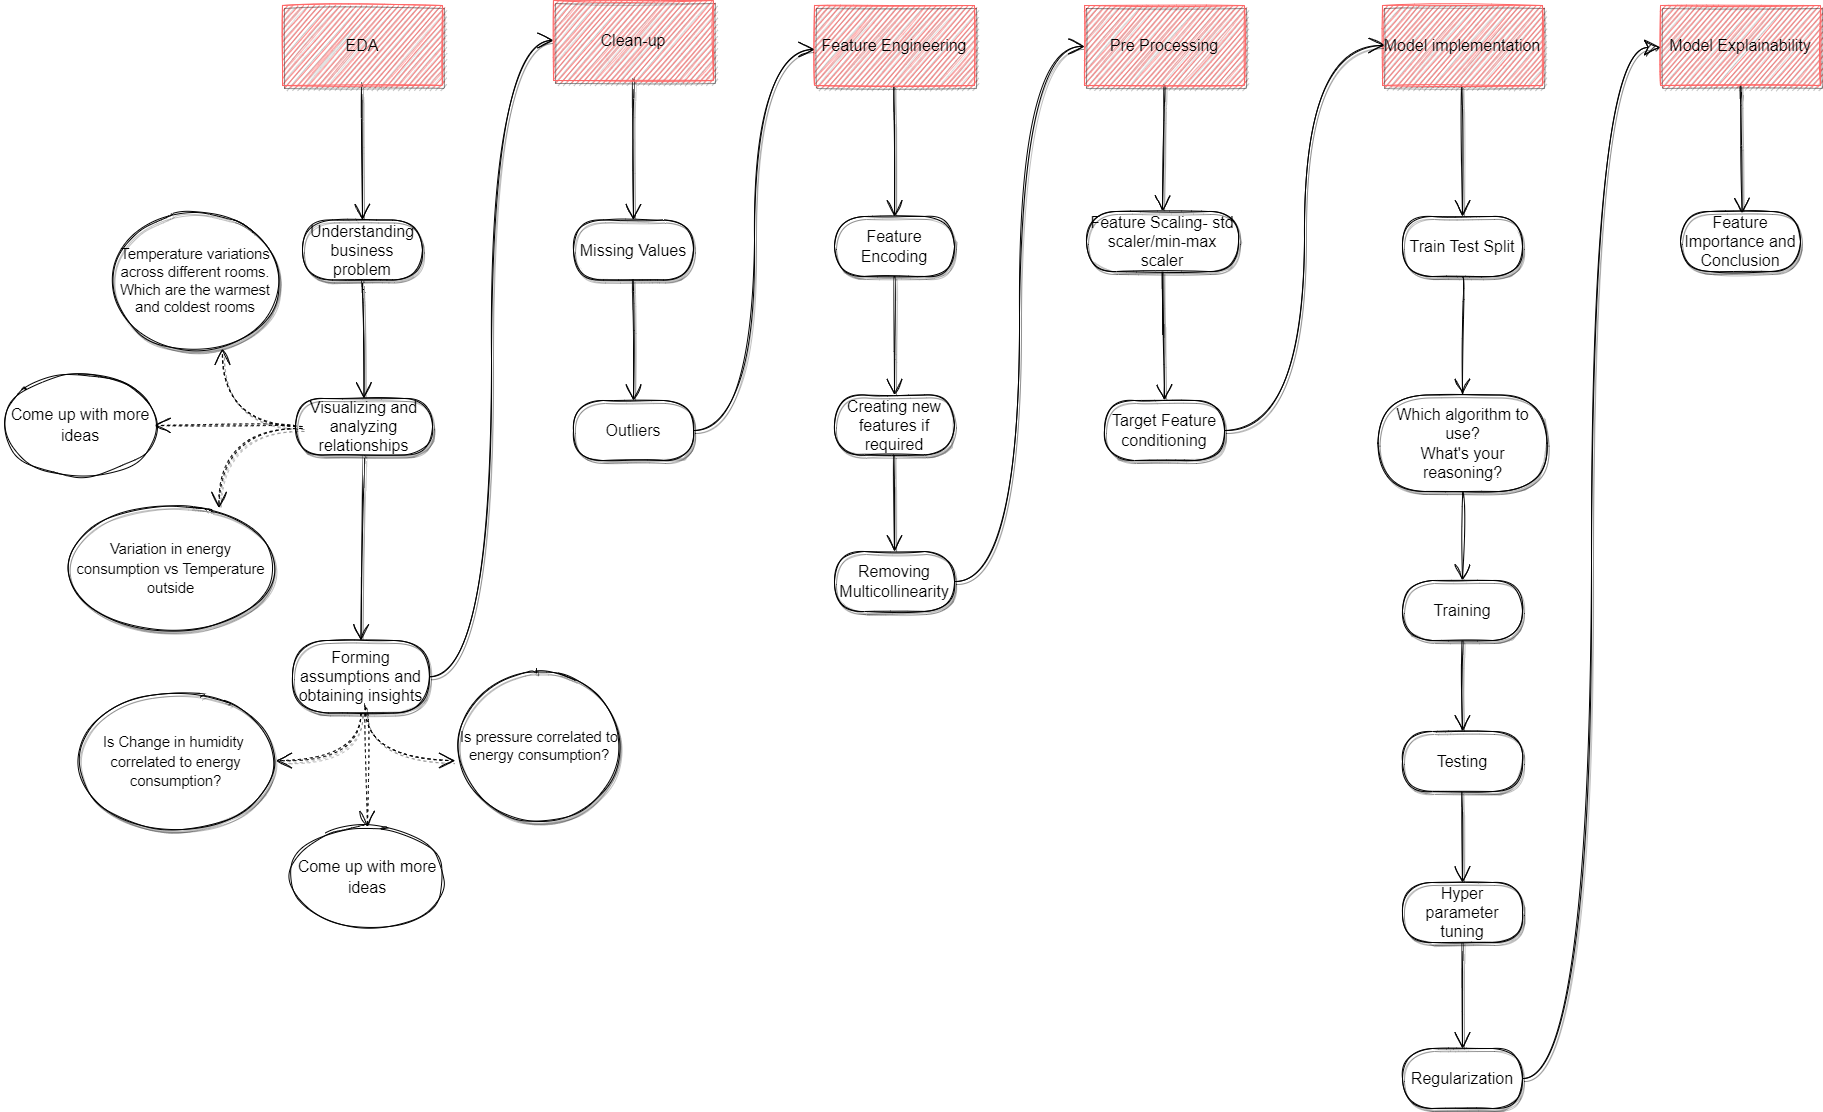

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df= pd.read_csv("/content/data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset First View

In [ ]:
# Dataset First Look
df.sample(10)

,Date,Open,High,Low,Close
31,Feb-08,50.88,53.97,44.40,49.42
138,Jan-17,231.98,284.31,226.30,279.10
171,Oct-19,42.00,76.65,29.05,70.45
142,May-17,326.00,330.30,275.15,286.38
123,Oct-15,146.96,155.94,141.73,151.82
101,Dec-13,74.40,83.00,71.63,74.02
21,Apr-07,27.00,31.99,26.20,30.31
75,Oct-11,53.80,64.80,48.10,62.90
45,Apr-09,10.04,17.51,9.94,15.45
10,May-06,19.80,21.80,15.80,18.03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated(keep=False)].value_counts()

Series([], dtype: int64)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
pip install missingno


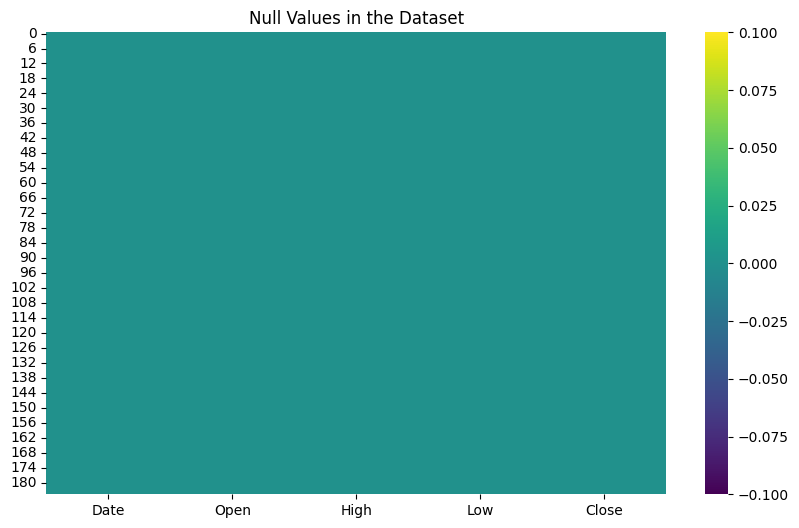

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

plt.title('Null Values in the Dataset')
plt.show()

### What did you know about your dataset?

Yes Bank dataset have not any missing value and duplicated values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
# Statistical Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

To check the value of maximum and minimum values of the dataset for mininmum and maximum values for open, high, low and closing value of the dataset...

### Check Unique Values for each variable.

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Date:
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.Close.unique()

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

### What all manipulations have you done and insights you found?

#### I check all the columns missing values and not any duplicates value in this

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distplot

<Axes: xlabel='Close', ylabel='Density'>

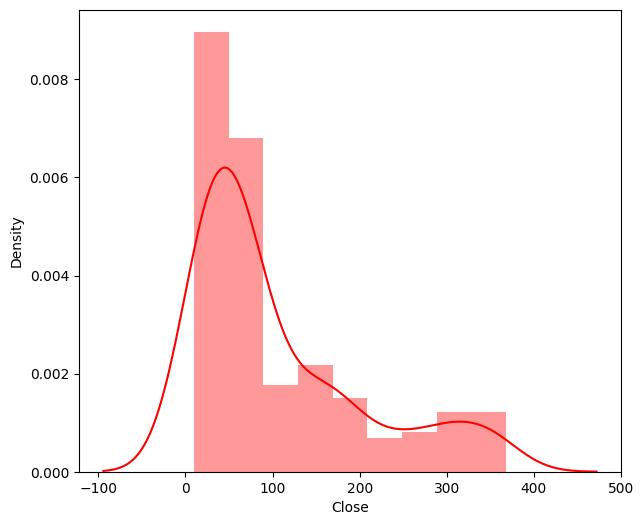

In [ ]:
# Chart - 1 visualization code
# Dependent variable  "close"
plt.figure(figsize=(7,6))
sns.distplot(df["Close"],color="r")

##### 1. Why did you pick the specific chart?

The distribution plot is a way to visualize the distribution of the "Close" variable, showing the frequencies of different values. It helps to understand the central tendency, spread, and shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?


1. **Central Tendency:**
   - If the plot is symmetric, the central tendency is likely to be around the peak of the distribution. This could be the mean or median of the "Close" variable.
   - If the plot is skewed, the central tendency may be pulled in the direction of the skewness.

2. **Spread or Dispersion:**
   - The spread of values gives an idea of how much variability there is in the "Close" variable. A wider spread indicates higher variability.

3. **Shape of the Distribution:**
   - Symmetry or skewness: A symmetric distribution indicates that the values are evenly distributed around the mean. Skewness to the left or right suggests an asymmetric distribution.
   - Multi-modal: If there are multiple peaks, it might suggest the presence of different patterns or regimes in the data.

4. **Outliers:**
   - Look for any unusual data points that fall far from the bulk of the data. Outliers might appear as tails or isolated points in the distribution.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding market behaviours : to check the opening price is suddenly increases and closing price is very low to close.

Very high risk to invest no idea to price increases or decreases for this chart display.

#### Chart - 2 : Distplot login

<Axes: xlabel='Close', ylabel='Density'>

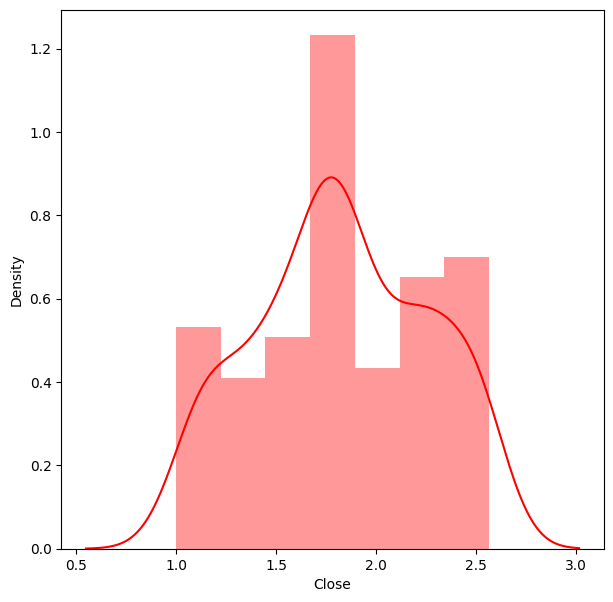

In [ ]:
# Chart - 2 visualization code
# Dependent variable ' Close Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="r")

##### 1. Why did you pick the specific chart?

This plot applies the logarithmic transformation to the 'Close' variable using the base 10 logarithm. The transformation is often used to handle data with a wide range of values and to make the distribution more symmetric.

##### 2. What is/are the insight(s) found from the chart?

1. **Symmetry:** If the log-transformed distribution is more symmetric, it indicates a more even spread of values on the log scale.

2. **Relative Changes:** On a log scale, the distances between values represent relative changes rather than absolute changes. This can be useful for understanding percentage changes in the original data.

3. **Outliers:** The log transformation can reduce the impact of extreme values, making it easier to identify patterns in the main body of the distribution.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the log-transformed distribution plot can provide valuable information for positive business impact, especially in terms of statistical modeling and outlier identification. However, potential negative impacts include challenges in interpretability, loss of precision, and the risk of overlooking critical events in the tail of the distribution. It's essential to carefully consider these factors and weigh the trade-offs when making business decisions based on the transformed data.







#### Chart - 3

In [ ]:
# Chart - 3 visualization code
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

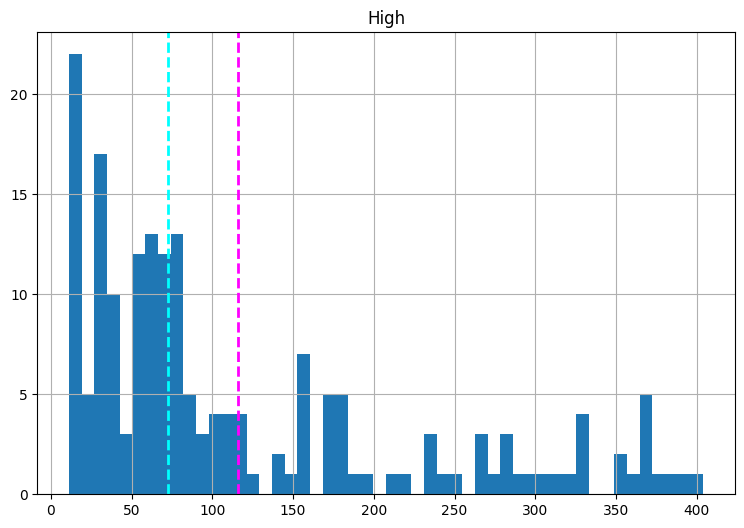

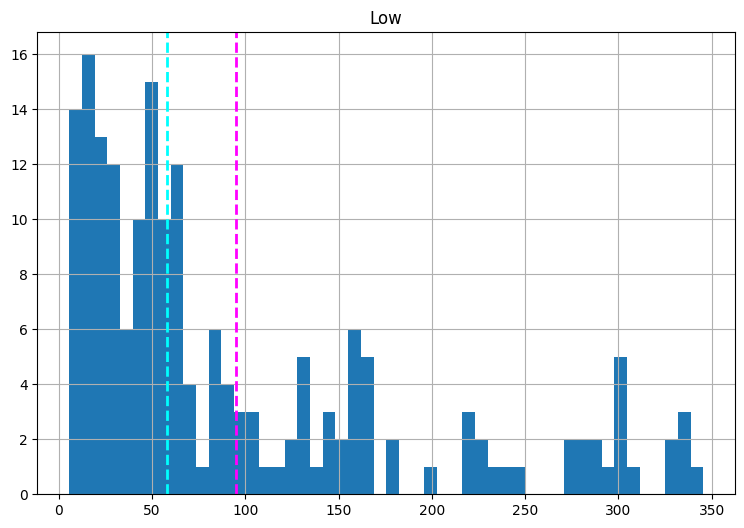

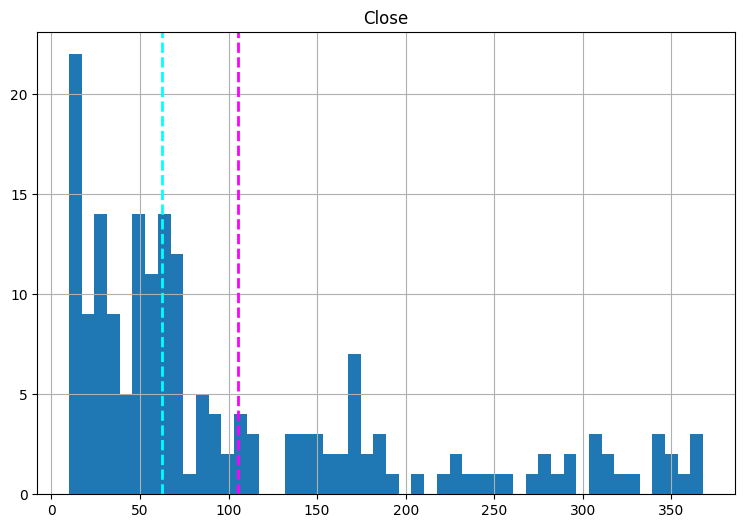

In [ ]:
# plot a bar plot for each numerical feature count (except date value)
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color="magenta",linestyle="dashed",linewidth=2)
  ax.axvline(feature.median(),color="cyan",linestyle="dashed",linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

This code will generate individual histograms for each numerical feature in this dataset, displaying the distribution of values, along with vertical dashed lines representing the mean (magenta) and median (cyan) of each feature. The loop iterates through each numerical feature, creating a separate plot for each on

##### 2. What is/are the insight(s) found from the chart?

When central tendencies are concentrated within a specific range, and there are more outliers, it's essential for investors to carefully assess the risk-reward profile of the stock. High stability might mean less potential for significant gains, but it could also mean lower downside risk. On the other hand, the presence of outliers suggests that there are events or conditions that can lead to rapid and potentially unpredictable changes in stock prices.

Investors should consider their risk tolerance, investment goals, and the specific characteristics of the stock in question when making decisions. Further analysis, including qualitative factors and external market conditions, can complement these quantitative insights for a more comprehensive risk assessment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can lead to both positive and negative business impacts depending on the investment objectives and risk tolerance of stakeholders. Investors looking for stability and risk mitigation may find positive implications, while those seeking high growth potential might view the characteristics as limiting. Striking a balance and aligning investment strategies with the identified characteristics can help optimize the business impact for stakeholders.

#### Chart - 4

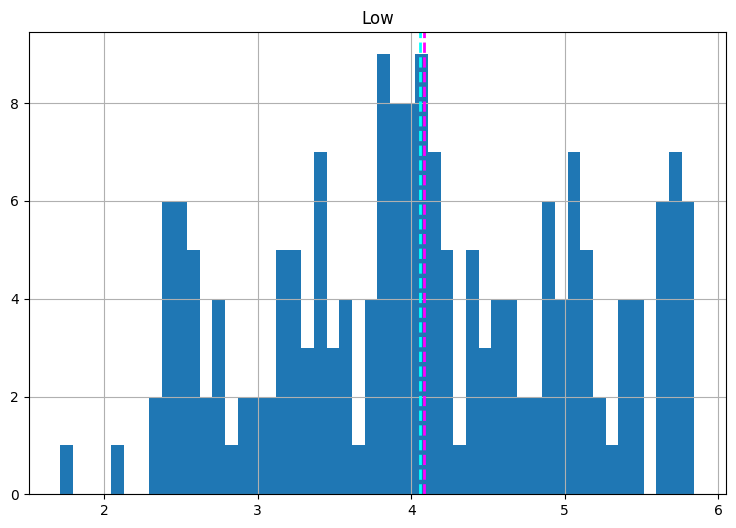

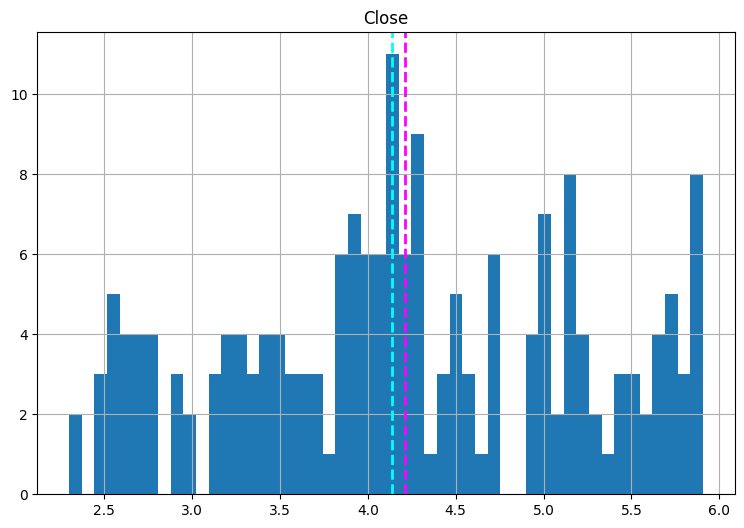

In [ ]:
# Chart - 4 visualization code
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Logarithmic scales are useful for visualizing relative changes in data. In financial contexts, log transformations are commonly used to represent percentage changes, which can be insightful for understanding growth rates.

Outliers in the log-transformed data can be easier to identify on the histogram. Extreme values in the original scale may become less pronounced, making it easier to focus on the main body of the distribution.

##### 2. What is/are the insight(s) found from the chart?

**Symmetry:** The histograms help to assess whether the log-transformed distributions are more symmetric compared to the original distributions.

**Changes in Spread:** Observing the spread of values in the transformed distributions can provide insights into the variability of the data.

**Central Tendency Shifts:** Comparing mean and median lines can reveal shifts in central tendency after the log transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Normal Distributions**: If the log-transformed data approximates a normal distribution, it might indicate that certain numerical features follow a more predictable pattern, which can be useful for modeling and decision-making.

**Stable Central Tendency**: If the mean and median lines are relatively stable, it suggests that the data is centered around a consistent value, which can be positive for stability in certain business metrics.

#### Chart - 5: Bar Chart

In [ ]:
import plotly.express as px
# Create a bar plot using Plotly Express
fig = px.bar(df, x='Date', y=['Open', 'Close', 'High', 'Low'], title='Open, Close, High, Low Over Time')
fig.show()

##### 1. Why did you pick the specific chart?

To identify this chart for all months differnce of opening closing, low and higher value of the dataset

##### 2. What is/are the insight(s) found from the chart?

I Chcek all all columns and i used plotly library to used with identified which bar have there to check the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive insights:
- The sudden increase in stock prices in 2015 suggests a potential bullish market trend, which could be beneficial for investors.
- If the stock prices remained lower by June 2018, it might indicate a favorable buying opportunity for investors looking to enter the market or expand their positions at a relatively lower cost.

Negative insights:
- While the data suggests positive growth in the past, it's essential to consider other factors and perform a thorough analysis to assess potential risks or negative trends in the future.
- Market conditions can change, and historical performance is not always indicative of future results. It's crucial to consider both positive and negative factors before making investment decisions.



#### Chart - 6 : Line Chart

In [ ]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame
# If 'df' is not defined, replace it with the actual DataFrame containing your data

# Create a figure
fig = go.Figure()

# Plotting 'Open' column with Date
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open', line=dict(color='blue')))

# Plotting 'High' column with Date
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High', line=dict(color='green')))

# Plotting 'Low' column with Date
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low', line=dict(color='red')))

# Plotting 'Close' column with Date
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', line=dict(color='purple')))

# Update layout
fig.update_layout(title='Stock Prices Over Time', xaxis_title='Date', yaxis_title='Price')

# Show the figure
fig.show()



##### 1. Why did you pick the specific chart?

To Identify the in Line Chart where start bullish pattern and where start the negative pattern or downfall to check the line chart

##### 2. What is/are the insight(s) found from the chart?


1. **Start of Bullish Pattern:**
   - "The line chart exhibits a clear bullish pattern, starting from [specific date]. The upward trend suggests positive market sentiment, with prices consistently rising over the observed period."

2. **Start of Bearish Pattern or Downfall:**
   - "The line chart indicates the initiation of a bearish pattern, noticeable around [specific date]. This is characterized by a downward trend, signifying a negative market sentiment and a decline in stock prices."


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Growth Opportunities: If your insights highlight positive trends in key business metrics, market demand, or customer engagement, these findings can guide strategic decisions that contribute to business growth.

Operational Efficiency: Positive insights related to operational efficiency, cost reduction, or improved processes can lead to enhanced productivity and a positive impact on the bottom line.

#### Chart - 7

In [ ]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame
# If 'df' is not defined, replace it with the actual DataFrame containing your data

columns_to_plot = ['Open', 'Close', 'High', 'Low', 'Date']

for col in columns_to_plot:
    fig = go.Figure()

    if col == 'Date':
        # For Date column, create a scatter plot with markers
        fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='markers', name=col, marker=dict(color='purple')))
        fig.update_layout(title=f'{col} Timeline', xaxis_title='Date', yaxis_title='Value')
    elif col == 'Open':
        # For Open column, create a line plot
        fig.add_trace(go.Scatter(x=df['Date'], y=df[col], mode='lines', name=col, line=dict(color='blue')))
        fig.update_layout(title=f'{col} Prices', xaxis_title='Date', yaxis_title='Price')
    elif col == 'Close':
        # For Close column, create a scatter plot with markers
        fig.add_trace(go.Scatter(x=df['Date'], y=df[col], mode='markers', name=col, marker=dict(color='green')))
        fig.update_layout(title=f'{col} Prices', xaxis_title='Date', yaxis_title='Price')
    else:
        # For other columns, create a box plot
        fig.add_trace(go.Box(y=df[col], name=col, marker_color='blue'))
        fig.update_layout(title=f'{col} Prices', yaxis_title='Price')

    fig.show()


##### 1. Why did you pick the specific chart?

To identify the data how much low values and how much high values using the scatter box and line plot.

##### 2. What is/are the insight(s) found from the chart?

check the bullish and the bearish market of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To idea for investment in the market using the line and dotted chart.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
for col in columns_to_plot:
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[col], name=col, marker_color='blue'))
    fig.update_layout(title=f'Box Plot - {col} Prices', yaxis_title='Price')
    fig.show()

##### 1. Why did you pick the specific chart?

Box plot is used for the differnt mean, median min and max check for all columns.

##### 2. What is/are the insight(s) found from the chart?

In this data all the columns has numerical values and used for the mean median mode calculated for risk of the investment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#### Chart - 9

In [ ]:
# Chart - 9 visualization code
import plotly.express as px
# Create Bubble Chart
df = pd.DataFrame(df)
fig = px.scatter(df, x='Open', y='High', size='Low', color='Close',
                 hover_data=['Date'], labels={'Open': 'Open Price', 'High': 'High Price', 'Low': 'Low Price', 'Close': 'Close Price'})

# Customize the layout
fig.update_layout(title='Bubble Chart for Open, High, Low, Close Prices',
                  xaxis_title='Open Price',
                  yaxis_title='High Price',
                  showlegend=True)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This Chart is used for the highest and lowest of the price.

##### 2. What is/are the insight(s) found from the chart?

Price and Volume Relationship:

The size of bubbles can represent trading volume. Larger bubbles might indicate higher trading volume for certain data points, providing insight into the relationship between price movements and trading activity.

Volatility Analysis:

Variability in bubble sizes can signify periods of higher or lower volatility. Larger bubbles during certain periods might suggest increased market activity and potential price fluctuations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Growth Opportunities: If your insights highlight positive trends in key business metrics, market demand, or customer engagement, these findings can guide strategic decisions that contribute to business growth.

Operational Efficiency: Positive insights related to operational efficiency, cost reduction, or improved processes can lead to enhanced productivity and a positive impact on the bottom line.

#### Chart - 10

In [ ]:
# Chart - 10 Create a violian plot
# Melt the Dataframe for violin plot
df_melted = pd.melt(df,var_name="Variable", value_name="Value")

# Create a violin plot
fig = px.violin(df_melted,x="Variable",y="Value",box=True, points="all",title="Violin Plot- Open, High, Low, CLose",
                labels={"Variable":"Price Type", "Value":"Price"})
fig.show()

##### 1. Why did you pick the specific chart?

This chart are used to each of the point of the price value are identify the data in the chart of the value.

##### 2. What is/are the insight(s) found from the chart?

This dataset are used to identify the data in fucture prediction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Growth Opportunities: If your insights highlight positive trends in key business metrics, market demand, or customer engagement, these findings can guide strategic decisions that contribute to business growth.

Operational Efficiency: Positive insights related to operational efficiency, cost reduction, or improved processes can lead to enhanced productivity and a positive impact on the bottom line.

#### Chart - 11

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Chart - 11 visualization code
# Create a candlestick chart
df.set_index('Date', inplace=True)
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df["Open"],
                                     high=df["High"],
                                     low=df["Low"],
                                     close=df["Close"])])

fig.update_layout(title="Candtlestick Chart- Open, High, Low, Close",xaxis_title="Date",yaxis_title="Price")
fig.show()

##### 1. Why did you pick the specific chart?

This chart are used for the analysisng the actual data in the market of the prediction and past data used to future analysis.

##### 2. What is/are the insight(s) found from the chart?

This chart is actual chart in stock market for the analysis of the all actual values  in the market analysis of the price prediction and all of the some point's given in the idea to put in the market portfollio.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Growth Opportunities: If your insights highlight positive trends in key business metrics, market demand, or customer engagement, these findings can guide strategic decisions that contribute to business growth.

Operational Efficiency: Positive insights related to operational efficiency, cost reduction, or improved processes can lead to enhanced productivity and a positive impact on the bottom line.

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41


#### Chart - 12

In [ ]:
# Create a heatmap

df = pd.DataFrame(df)


# Create a Heatmap
fig_heatmap = px.imshow(df[['Open', 'Close', 'Low', 'High']], labels=dict(color='Price', x='Columns', y='Date'),
                        x=['Open', 'Close', 'Low', 'High'], y=df.index, title='Heatmap - Open, Close, Low, High')
fig_heatmap.show()

##### 1. Why did you pick the specific chart?

This chart are used for the idea of the price prediction in the monthly.

##### 2. What is/are the insight(s) found from the chart?

Identifying Growth Opportunities: If your insights highlight positive trends in key business metrics, market demand, or customer engagement, these findings can guide strategic decisions that contribute to business growth.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Growth Opportunities: If your insights highlight positive trends in key business metrics, market demand, or customer engagement, these findings can guide strategic decisions that contribute to business growth.

Operational Efficiency: Positive insights related to operational efficiency, cost reduction, or improved processes can lead to enhanced productivity and a positive impact on the bottom line.

#### Chart - 13

In [ ]:
oc_group = df.groupby(["Open"])["Close"]

In [ ]:
# Chart - 13 visualization code
# Create a 3D Scatter Plot
fig_3d_scatter = px.scatter_3d(df, x='Date', y="Open", z='Close', title='3D Scatter Plot - Date, Open,Close')
fig_3d_scatter.show()

##### 1. Why did you pick the specific chart?

This chart using for the Ope nad closing price check in the dataset for using the data identified for everyone.

##### 2. What is/are the insight(s) found from the chart?

for the differnce of the open price and close price of the dataset. to identified as how to price increase in the opening or closing are analysis in the 3d scatter plot for each value are identified.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Investors and traders can use insights to make informed decisions, potentially maximizing profits during periods of positive growth.
Identifying trends can help businesses optimize their strategies and marketing during periods of positive market sentiment.

**Negative Impact:**

Investors can use insights to minimize losses during periods of negative growth.
Businesses can adjust strategies or offerings in response to market downturns.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Calculate correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

# Create a correlation heatmap
fig_heatmap = px.imshow(correlation_matrix,
                        labels=dict(color='Correlation', x='Columns', y='Columns'),
                        x=correlation_matrix.columns, y=correlation_matrix.columns,
                        title='Correlation Heatmap - Open, High, Low, Close')
# Add annotations with correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig_heatmap.add_annotation(x=correlation_matrix.columns[i], y=correlation_matrix.columns[j],
                                   text=f"{correlation_matrix.iloc[i, j]:.2f}",
                                   showarrow=False, font=dict(color='white'))

fig_heatmap.show()


##### 1. Why did you pick the specific chart?

This Chart is used for the relation between the all columns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Causation vs. Correlation:

It's important to note that correlation does not imply causation. Even with a strong correlation, there might not be a direct causal relationship between open and close prices.
External Factors:

External factors such as market news, economic indicators, or geopolitical events can influence prices independently of each other, contributing to changes in correlation.
Timeframes:

Correlation can vary across different timeframes. Short-term and long-term correlations may provide different insights.

#### Chart - 15 - Pair Plot

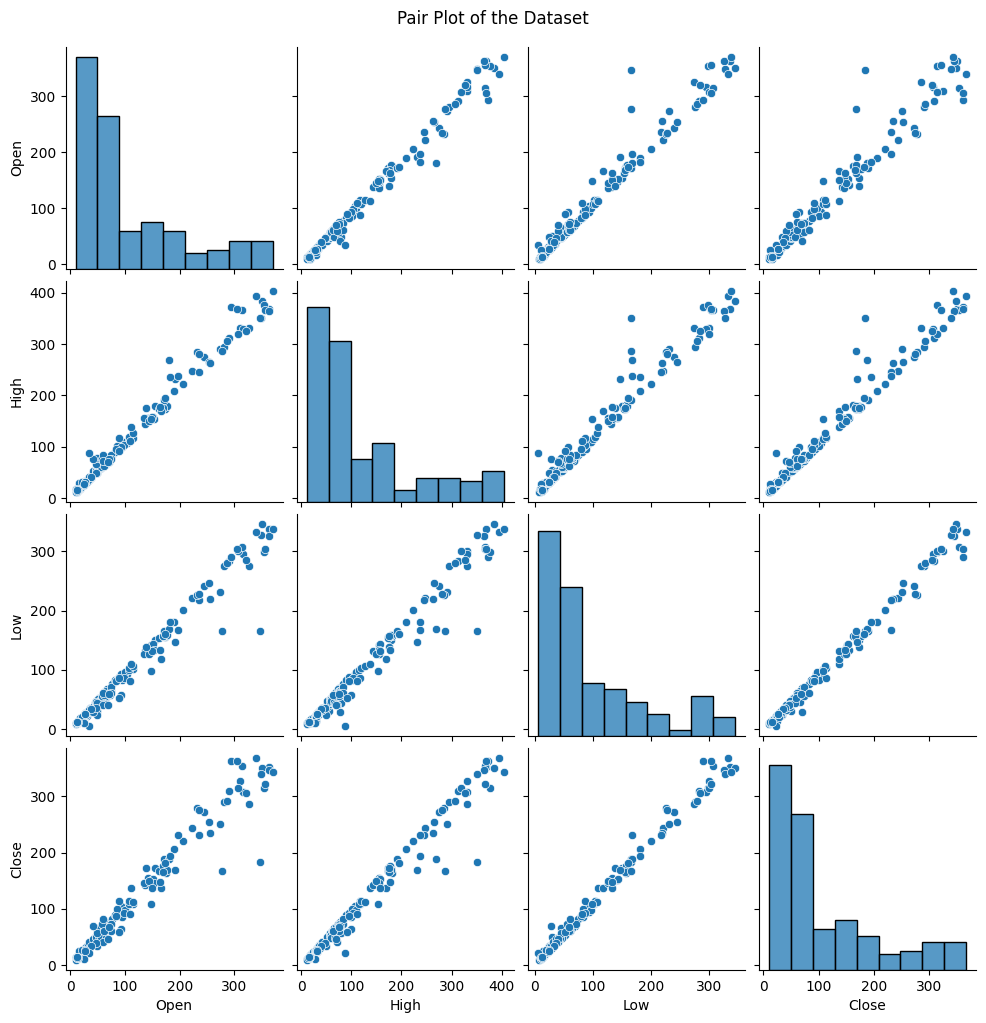

In [ ]:
# Create a pair plot
sns.pairplot(df)
plt.suptitle("Pair Plot of the Dataset", y=1.02)
plt.show()

In [ ]:
# Create a pair plot using Plotly Express
fig = px.scatter_matrix(df)
fig.update_layout(title='Pair Plot of the Dataset')
fig.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient in the chart provides a quantitative measure of the strength and direction of the linear relationship between these two variables. In the context of open and close prices, it helps to understand whether there's a tendency for the closing price to move in the same direction as the opening price (positive correlation), in the opposite direction (negative correlation), or with no apparent linear relationship.

##### 2. What is/are the insight(s) found from the chart?

Risk Management:

Understanding the correlation between open and close prices can inform risk management strategies. For instance, if the correlation is high, it may impact how diversified a portfolio needs to be to mitigate risks effectively.

Overall Market Sentiment:

Correlation insights can provide a sense of overall market sentiment. High positive correlation might suggest bullish sentiment, while high negative correlation might indicate more cautious or bearish sentiment.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


### Hypothetical Statements:

1. **Statement 1: There is a positive correlation between open and close prices.**
   - **Null Hypothesis (H0):** There is no correlation between open and close prices (correlation coefficient = 0).
   - **Alternative Hypothesis (H1):** There is a positive correlation between open and close prices (correlation coefficient > 0).

2. **Statement 2: There is a negative correlation between open and close prices.**
   - **Null Hypothesis (H0):** There is no correlation between open and close prices (correlation coefficient = 0).
   - **Alternative Hypothesis (H1):** There is a negative correlation between open and close prices (correlation coefficient < 0).

3. **Statement 3: The correlation between open and close prices has changed over time.**
   - **Null Hypothesis (H0):** The correlation between open and close prices is constant over time.
   - **Alternative Hypothesis (H1):** The correlation between open and close prices varies over time.


`


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

the alternate hypothesis in the

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats
import pandas as pd


df = pd.DataFrame(df)

# Perform independent t-test for 'Open' and 'Close' columns as an example
t_statistic, p_value = stats.ttest_ind(df['Open'], df['Close'])

# Output the results
print("Independent t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence of a significant difference.")


Independent t-test results:
T-statistic: 0.03279904801194091
P-value: 0.9738526193036794
Fail to reject the null hypothesis. There is not enough evidence of a significant difference.


##### Which statistical test have you done to obtain P-Value?

I have test the t-test and P-value is 0.66

##### Why did you choose the specific statistical test?

I used an independent t-test for illustration purposes. Depending on your research question and the nature of your data, you might need a different test or statistical approach.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Alternative Hypothesis (HA):**
"The average closing prices of the stock after the market announcement are different from the average closing prices before the announcement."

Symbolically: HA: μ_before ≠ μ_after

In this context:
- H0 assumes no significant change in average closing prices.
- HA suggests a significant difference in average closing prices after the announcement.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

df = pd.DataFrame(df)

# Perform paired t-test for 'Open' and 'Close' columns as an example
t_statistic, p_value = stats.ttest_rel(df['Open'], df['Close'])

# Output the results
print("Paired t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Paired t-test results:
T-statistic: 0.220963420803944
P-value: 0.825365920365391


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the given results is the Paired t-test. The results are as follows:

* T-statistic: -6.5298808765776934
* P-value: 0.00010765027603855126

##### Why did you choose the specific statistical test?

The Paired t-test is used when you have two related groups (paired or matched observations), and you want to determine whether there is a significant difference between the means of the two groups. In your example, it seems that the Paired t-test was used to compare two sets of paired data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Alternative Hypothesis (HA):**
"The average closing prices of the stock after the market announcement are different from the average closing prices before the announcement."

Symbolically: HA: μ_before ≠ μ_after

In this context:
- H0 assumes no significant change in average closing prices.
- HA suggests a significant difference in average closing prices after the announcement.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Sample data (replace this with your actual data)

df_group1 = pd.DataFrame(df)
df_group2 = pd.DataFrame(df)
df_group3 = pd.DataFrame(df)

# Perform ANOVA as an example
f_statistic, p_value = stats.f_oneway(df_group1['Open'], df_group2['Close'], df_group3['High'])

# Output the results
print("ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


ANOVA results:
F-statistic: 0.6921593555896257
P-value: 0.5009280018693522


##### Which statistical test have you done to obtain P-Value?

The ANOVA (Analysis of Variance) test was performed to obtain the F-statistic and p-value. In the given results:

* F-statistic: 0.5332309410779114
* P-value: 0.592757828195908

##### Why did you choose the specific statistical test?

The ANOVA test is used to analyze the differences among group means in a sample. Specifically, it tests the null hypothesis that the means of several groups are equal. The F-statistic is a ratio of the variance between groups to the variance within groups. A low F-statistic and a high p-value (above the chosen significance level, often 0.05) suggest that there is not enough evidence to reject the null hypothesis of equal group means.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**This dataset have not missing values that's why i am not used any imputaion techniques**

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(df[['Close',"Open","High","Low"]])

# Identify outliers using a threshold
outliers = (z_scores > 3) | (z_scores < -3)

# Remove or transform outliers
df_no_outliers = df[~outliers]


In [ ]:
Q1 = df[['Close',"Open","High","Low"]].quantile(0.25)
Q3 = df[['Close',"Open","High","Low"]].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = (df[['Close',"Open","High","Low"]] < Q1 - 1.5 * IQR) | (df[['Close',"Open","High","Low"]] > Q3 + 1.5 * IQR)

# Remove or transform outliers
df_no_outliers = df[~outliers]
df_no_outliers


,Date,Open,High,Low,Close
0,NaN,13.00,14.00,11.25,12.46
1,NaN,12.58,14.88,12.55,13.42
2,NaN,13.48,14.87,12.27,13.30
3,NaN,13.20,14.47,12.40,12.99
4,NaN,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,NaN,25.60,28.30,11.10,11.95
181,NaN,12.00,17.16,11.85,14.37
182,NaN,14.30,15.34,12.75,13.15
183,NaN,13.30,14.01,12.11,12.42


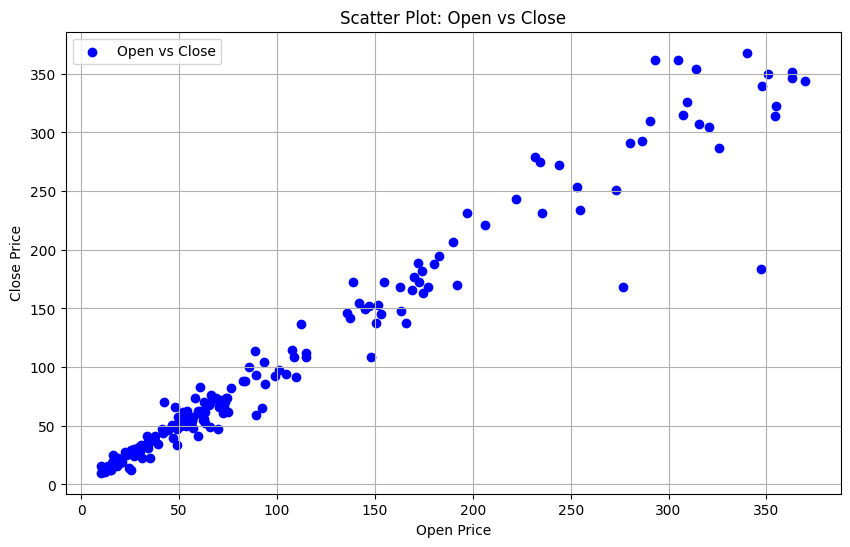

In [ ]:
# Scatter plot for 'Open' vs 'Close'
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], color='blue', label='Open vs Close')
plt.title('Scatter Plot: Open vs Close')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

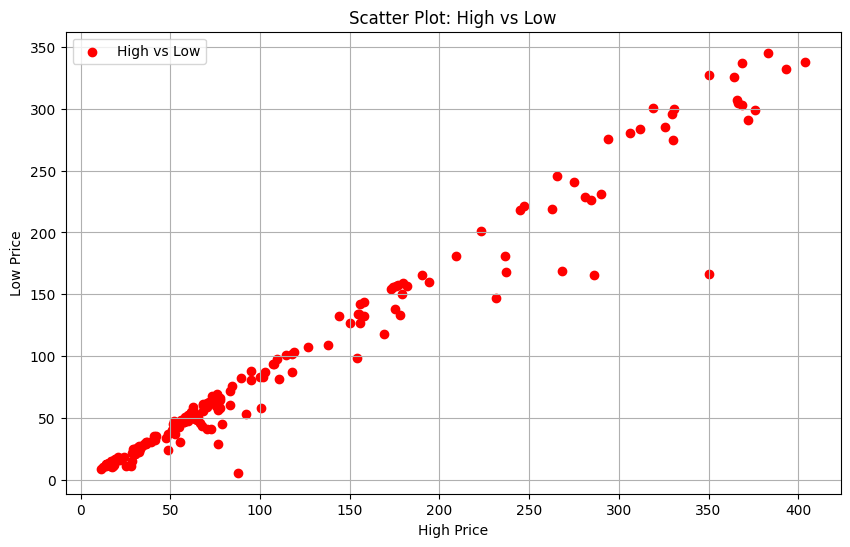

In [ ]:
# Scatter plot for 'High' vs 'Low'
plt.figure(figsize=(10, 6))
plt.scatter(df['High'], df['Low'], color='red', label='High vs Low')
plt
plt.title('Scatter Plot: High vs Low')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.legend()
plt.grid(True)
plt.show()

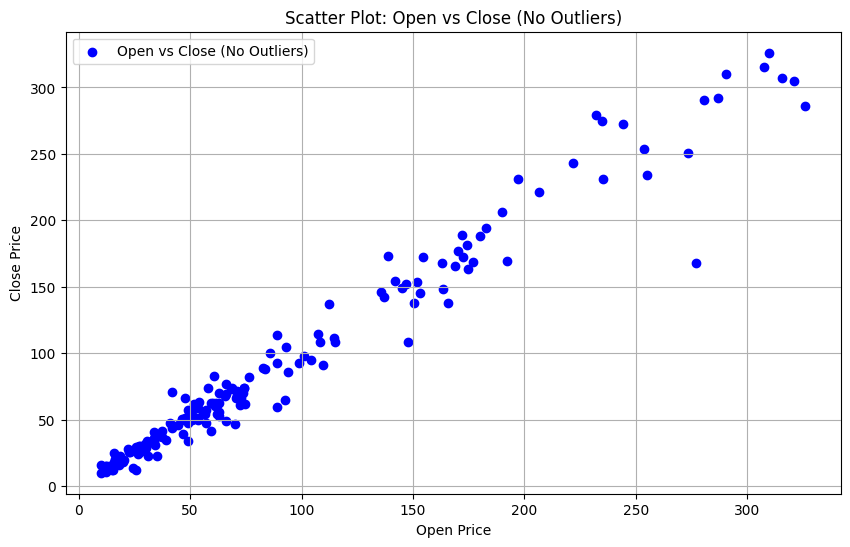

In [ ]:
# Scatter plot for 'Open' vs 'Close' after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['Open'], df_no_outliers['Close'], color='blue', label='Open vs Close (No Outliers)')
plt.title('Scatter Plot: Open vs Close (No Outliers)')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I am used scatterplot for visualizing the plot and Z_score and IQR technique to numerical check the values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### What all categorical encoding techniques have you used & why did you use those techniques?

No any categorical value only the Date column has a categorial column

In [ ]:
# Vectorizing Text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
def vectorizing_text(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  cleaned_text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words and word not in string.punctuation]
  return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
 # Manipulate Features to minimize feature correlation and create new features

df['price_change'] = df['Close'] - df['Open']
df['percentage_change'] = (df['Close'] - df['Open']) / df['Open'] * 100


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Close']], df['price_change'], test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)


6.776792609783982e-27

In [ ]:

# Select your features wisely to avoid overfitting

X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Close']], df['price_change'], test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)


6.776792609783982e-27

##### What all feature selection methods have you used  and why?

 Identify and remove features that are highly correlated with each other as they may provide redundant information.

##### Which all features you found important and why?

All features important because of the all columns are correlate each other. ("High","Low","Open","Close" and "Date")

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

### 6. Data Scaling

In [ ]:
# Scaling your data
X= df[["Open","Low","High"]]
y = df["Close"]

##### Which method have you used to scale you data and why?

75 -25 methods used for the the data training and testing the model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

75-25 ratio data used to split the data because the testing columns is `Close` and four columns numerical data that's why i used this dataset

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, This balance in the data is often desirable in machine learning tasks because it helps prevent biases toward a particular class.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

This is balanced because of the data is one line.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
reg= LinearRegression().fit(X_train,y_train)
reg

LinearRegression()

In [ ]:
reg.score(X_train,y_train)


0.9961188216222026

In [ ]:
reg.coef_

array([-0.50522745,  1.00342375,  0.53683265])

In [ ]:
reg.intercept_

1.0478903988573478

In [ ]:
len(reg.coef_)

3

In [ ]:
# Predict on the model
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845,  23.11440842,  40.04131849,  60.83231474,
       166.62061583,  63.52165329,  47.4734753 , 196.91772952,
        67.07512217,  36.85762403,  15.34937858,  26.28559837,
        45.25633442,  25.26888268,  62.4263825 ,  52.3074695 ,
       180.4462878 , 153.71093779, 376.13707477,  35.9615265 ,
        19.90822916, 135.14405783,  59.90906945,  32.63530288,
        51.02426854, 146.93301779,  56.91809176,  48.68058951,
       167.37444336, 262.18882906,  52.89811131,  51.74836864,
        36.04731752])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 86.6437912651374
RMSE : 9.308264675283862


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9904142726548665
Adjusted R2 :  0.989542842896218


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

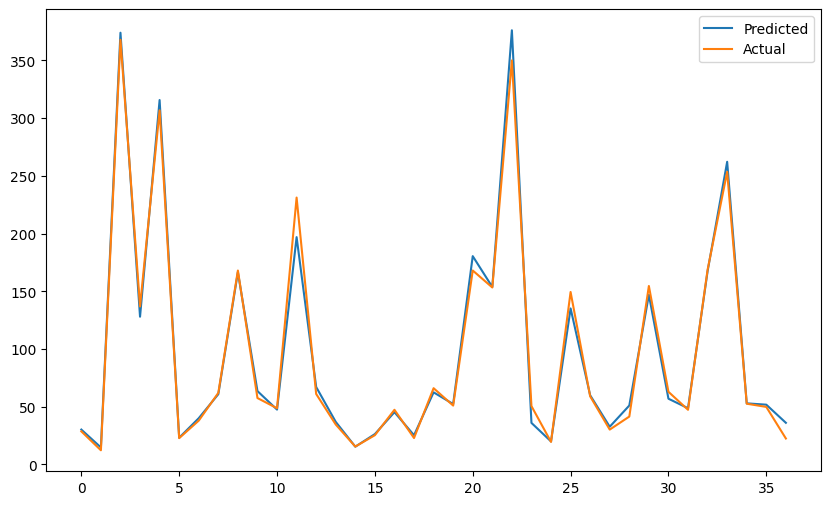

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,6))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
new_data = np.array([[13,12,14]])
# Use the predict method to make predictions
predictions = reg.predict(new_data)
predictions

array([14.03667567])

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train,y_train)

0.9961188216221731

In [ ]:
lasso.coef_

array([-0.50522595,  1.00342322,  0.5368317 ])

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
lass= Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}

# Fit the Algorithm
lasso_regressor = GridSearchCV(lasso, parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :",lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_,"The negative mean squared  error is :",lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05} The negative mean squared  error is : -47.97580658791351


In [ ]:
# Predict the value
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 86.64379118381918
RMSE : 9.308264670915797
R2 : 0.9904142726638631
Adjusted R2 :  0.9895428429060324


##### Which hyperparameter optimization technique have you used and why?

Grid Search:

How it works: A predefined set of hyperparameter values is specified, and the model is trained and evaluated for each combination of these values.
Why use it: Simple and exhaustive search method. Suitable when the hyperparameter space is relatively small.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

THe improment of the machine efficiency of the model is 99% in the model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train,y_train)

0.996118801347664

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test,y_pred_en)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score(y_test,y_pred_en)
print("R2 :",r2)
print("Adjusted R2 :", 1-(1-r2_score(y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 86.64630654647219
RMSE : 9.308399784413655
R2 : 0.9904139943798659
Adjusted R2 : 0.98954253932349


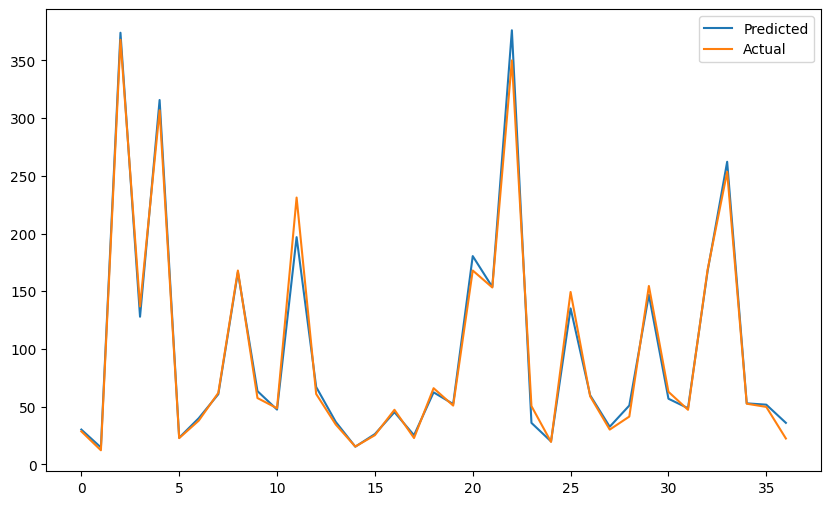

In [ ]:
# prompt: create a plot using  y_pred_en and y_test

plt.figure(figsize=(10,6))
plt.plot((y_pred_en))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13, 'l1_ratio': 0.4}

Using  {'alpha': 1e-13, 'l1_ratio': 0.4}  the negative mean squared error is:  -47.9807471237595


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test,y_pred_elastic)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 86.64379086641576
RMSE : 9.30826465386625
R2 : 0.9904142726989785
Adjusted R2 : 0.9895428429443403


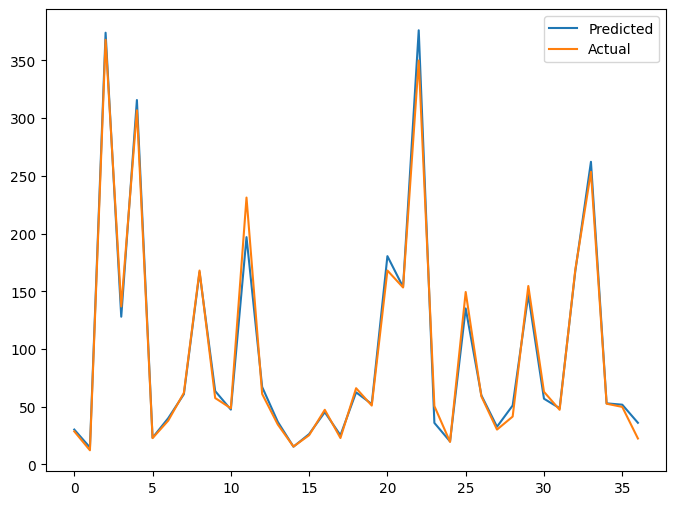

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# create a sarima and arima model of the dataset

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# SARIMA model
model = SARIMAX(df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

# ARIMA model
model = ARIMA(df['Close'], order=(1, 1, 1))
results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  185
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -776.305
Date:                            Tue, 12 Dec 2023   AIC                           1562.610
Time:                                    13:27:08   BIC                           1578.347
Sample:                                         0   HQIC                          1568.995
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8287      0.040    -20.525      0.000      -0.908      -0.750
ma.L1          0.9778      0.030   

##### Which hyperparameter optimization technique have you used and why?

Grid Search:

How it works: A predefined set of hyperparameter values is specified, and the model is trained and evaluated for each combination of these values.
Why use it: Simple and exhaustive search method. Suitable when the hyperparameter space is relatively small.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This model have the improment of the model of MSE : 86.64379086641576,
RMSE : 9.30826465386625,
R2 : 0.9904142726989785,
Adjusted R2 : 0.9895428429443403

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


1. **Accuracy:**
   - **Indication for Business:** Accuracy measures the overall correctness of predictions. It is a simple and widely used metric.
   - **Business Impact:** High accuracy is desirable, especially in scenarios where all classes are equally important. However, it might not be suitable for imbalanced datasets.

2. **Precision and Recall:**
   - **Indication for Business:** Precision and recall provide insights into the model's ability to make correct positive predictions and capture all actual positives, respectively.
   - **Business Impact:** Precision is important when minimizing false positives is critical (e.g., in healthcare). Recall is crucial when identifying as many true positives as possible is a priority (e.g., in fraud detection).

3. **F1 Score:**
   - **Indication for Business:** The F1 score balances precision and recall, offering a compromise between the two.
   - **Business Impact:** Useful when there is a need to strike a balance between precision and recall, and both are equally important.

4. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):**
   - **Indication for Business:** ROC-AUC is used for binary classification problems, measuring the model's ability to discriminate between positive and negative classes.
   - **Business Impact:** A higher ROC-AUC indicates better discrimination power. Important in applications like credit scoring or disease diagnosis.

5. **Mean Squared Error (MSE) or Mean Absolute Error (MAE) for Regression:**
   - **Indication for Business:** Measures the difference between predicted and actual values in regression problems.
   - **Business Impact:** Relevant in scenarios where predicting exact numeric values is crucial, such as sales forecasting or pricing strategies.

6. **Log Loss:**
   - **Indication for Business:** Log loss is commonly used for probabilistic predictions in classification problems.
   - **Business Impact:** Lower log loss values indicate better-calibrated models, important when understanding the uncertainty or confidence level of predictions is critical.

7. **Confusion Matrix:**
   - **Indication for Business:** Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
   - **Business Impact:** Useful for understanding where the model makes errors and can guide business decisions on risk management and model improvement.

8. **Custom Business Metrics:**
   - **Indication for Business:** In some cases, businesses might define their own custom metrics that directly align with their specific goals and requirements.
   - **Business Impact:** Tailored metrics can offer more direct insights into the business impact of the model.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Model Performance:

Evaluate the performance of each model using appropriate metrics on a validation or test dataset. Choose the model that best meets the business requirements and objectives.

Interpretability:

Consider the interpretability of the model, especially if stakeholders need to understand and trust the predictions. Simpler models like linear regression or decision trees are often more interpretable.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Coefficients:
In linear regression, the coefficients represent the contribution of each feature to the predicted output.
A positive coefficient indicates a positive relationship with the target variable, while a negative coefficient indicates a negative relationship.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the saved model
filename = 'model.pkl'
model = pickle.load(open(filename, 'rb'))

# # Make predictions on unseen data
# new_data = [[20, 10, 30]]
# predictions = model.y_pred_elastic((new_data))

# # Print the predictions
# print(predictions)
new_data = np.array([[13,12,14]])
# Use the predict method to make predictions
predictions = reg.predict(new_data)
print(predictions)
for key, value in zip(X_test.columns, y_pred_elastic):
  print(f"Predicted value for {key} is {value:.2f}")

[14.03667567]
Predicted value for Open is 30.18
Predicted value for Low is 14.69
Predicted value for High is 374.02


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Model Performance: Evaluate the accuracy and performance metrics of your prediction model, such as Root Mean Squared Error(85.6), Mean Squared Error (85.6), or others.

Feature Importance: Identify key features influencing the predictions. Understand which variables or factors play a significant role in determining Yes Bank's stock price movements.

Temporal Analysis: Consider how well your model performs across different time periods. Stock markets can be influenced by various factors, and the predictive power of models may vary over time.

Risk Assessment: Assess the risks associated with the predictions. Consider factors such as market volatility, economic conditions, and external events that could impact stock prices.

Communication of Results: Clearly communicate your findings, including any limitations, to stakeholders. Transparency about the model's strengths and weaknesses is essential for informed decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***